<a href="https://colab.research.google.com/github/vidheeshnacode/SM/blob/master/TS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MACD (Moving Average Converegence/Divergence) Crossover Strategy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TSLA_6_months.csv to TSLA_6_months.csv


In [ ]:
df = pd.read_csv('TSLA_6_months.csv')

df = df.set_index(pd.DatetimeIndex(df['Date']))

df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-03-02,2020-03-02,711.260010,743.690002,686.669983,743.619995,743.619995,20195000
2020-03-03,2020-03-03,805.000000,806.979980,716.109985,745.510010,745.510010,25784000
2020-03-04,2020-03-04,763.960022,766.520020,724.729980,749.500000,749.500000,15049000
2020-03-05,2020-03-05,723.770020,745.750000,718.070007,724.539978,724.539978,10852700
2020-03-06,2020-03-06,690.000000,707.000000,684.270020,703.479980,703.479980,12662900
...,...,...,...,...,...,...,...
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800
2020-08-13,2020-08-13,1611.000000,1651.180054,1567.260010,1621.000000,1621.000000,20425300


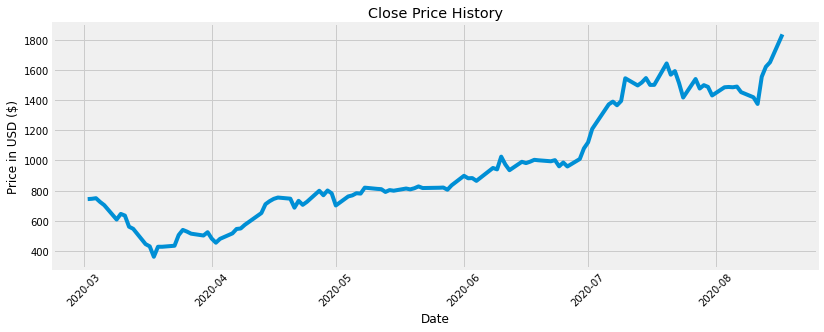

In [ ]:
plt.figure(figsize= (12.2, 4.5))
plt.xticks(rotation = 45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price in USD ($)')
plt.show()


In [ ]:
#MACD and signal line indicators
# for that first short term EMA is required
ShortEMA = df.Close.ewm(span = 12, adjust = False).mean()
#then long EMA
LongEMA = df.Close.ewm(span = 26, adjust = False).mean()
#MACD line is difference of ShortEMA and LongEMA
MACD = ShortEMA - LongEMA

#signal line
signal = MACD.ewm(span=9, adjust = False).mean()


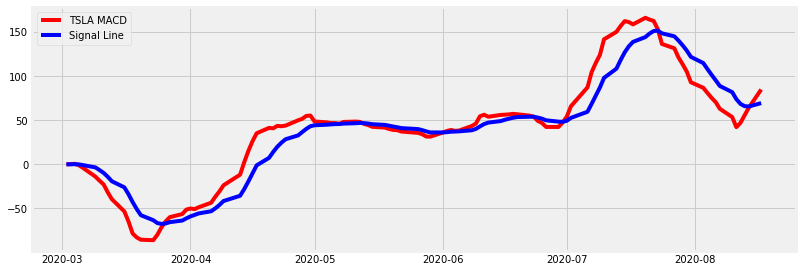

In [ ]:
plt.figure(figsize= (12.2, 4.5))
plt.plot(df.index, MACD, label = 'TSLA MACD', color= 'red')
plt.plot(df.index, signal, label = 'Signal Line', color = 'blue')
#plt.plot(df['Close'], label = 'Close', color = 'black')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
df['MACD'] = MACD
df['Signal Line'] = signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,,
2020-03-02,2020-03-02,711.260010,743.690002,686.669983,743.619995,743.619995,20195000,0.000000,0.000000
2020-03-03,2020-03-03,805.000000,806.979980,716.109985,745.510010,745.510010,25784000,0.150770,0.030154
2020-03-04,2020-03-04,763.960022,766.520020,724.729980,749.500000,749.500000,15049000,0.585467,0.141217
2020-03-05,2020-03-05,723.770020,745.750000,718.070007,724.539978,724.539978,10852700,-1.071744,-0.101375
2020-03-06,2020-03-06,690.000000,707.000000,684.270020,703.479980,703.479980,12662900,-4.037914,-0.888683
...,...,...,...,...,...,...,...,...,...
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800,42.094159,73.823139
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800,47.014931,68.461498
2020-08-13,2020-08-13,1611.000000,1651.180054,1567.260010,1621.000000,1621.000000,20425300,55.618555,65.892909


In [ ]:
#function to signal when to buy and sell

def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag!= 1:
        Buy.append(signal['Close'][i])
        flag =1 
      else:
        Buy.append(np.nan)

    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag!=0:
        Sell.append(signal['Close'][i])
        flag =0
      else:
        Sell.append(np.nan)

    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)

In [ ]:
a = buy_sell(df)

df['Buy Signal Price'] = a[0]
df['Sell Signal Price'] = a[1]
df 

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy Signal Price,Sell Signal Price
Date,,,,,,,,,,,
2020-03-02,2020-03-02,711.260010,743.690002,686.669983,743.619995,743.619995,20195000,0.000000,0.000000,NaN,NaN
2020-03-03,2020-03-03,805.000000,806.979980,716.109985,745.510010,745.510010,25784000,0.150770,0.030154,745.510010,NaN
2020-03-04,2020-03-04,763.960022,766.520020,724.729980,749.500000,749.500000,15049000,0.585467,0.141217,NaN,NaN
2020-03-05,2020-03-05,723.770020,745.750000,718.070007,724.539978,724.539978,10852700,-1.071744,-0.101375,NaN,724.539978
2020-03-06,2020-03-06,690.000000,707.000000,684.270020,703.479980,703.479980,12662900,-4.037914,-0.888683,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11,2020-08-11,1396.000000,1420.000000,1365.000000,1374.390015,1374.390015,8625800,42.094159,73.823139,NaN,NaN
2020-08-12,2020-08-12,1470.000000,1585.000000,1435.000000,1554.760010,1554.760010,21898800,47.014931,68.461498,NaN,NaN
2020-08-13,2020-08-13,1611.000000,1651.180054,1567.260010,1621.000000,1621.000000,20425300,55.618555,65.892909,NaN,NaN


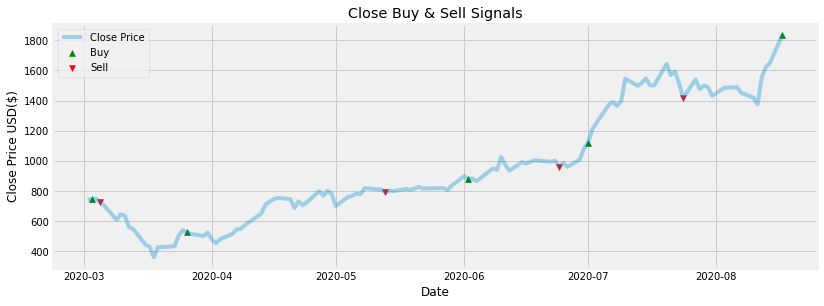

In [ ]:
plt.figure(figsize= (12.2, 4.5))
plt.scatter(df.index, df['Buy Signal Price'], color= 'green', label= 'Buy', marker= '^', alpha = 1)
plt.scatter(df.index, df['Sell Signal Price'], color= 'red', label= 'Sell', marker= 'v', alpha = 1)
plt.plot(df['Close'], label = 'Close Price', alpha = 0.35)
plt.title('Close Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc = 'upper left')
plt.show()